# #8 Min-Variance Portfolio

1. 최소-분산 포트폴리오를 구하고 그래프로 그려본다.
2. method using `minimize` in `scipy.optimize`
3.
4. pypfopt 패키지와 pulp를 이용하는 방법


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# import cvxopt as opt
# from cvxoppt import solvers
# solvers.options['show_progress'] = False

In [ ]:
tickers = ['AAPL', 'GOOGL', 'AMZN']
df = yf.download(tickers, start='2019-01-01')['Adj Close']

ret = df.pct_change(1).dropna()
ret.head()

[*********************100%***********************]  3 of 3 completed


,AAPL,AMZN,GOOGL
Date,,,
2019-01-03,-0.099607,-0.025241,-0.027696
2019-01-04,0.042689,0.050064,0.051294
2019-01-07,-0.002226,0.034353,-0.001994
2019-01-08,0.019063,0.016612,0.008783
2019-01-09,0.016982,0.001714,-0.003427


In [ ]:
ret_mtx = ret.values.T
ret_mtx

array([[-0.09960744,  0.0426892 , -0.00222581, ..., -0.00585988,
         0.00048668, -0.0056753 ],
       [-0.0252415 ,  0.050064  ,  0.03435341, ..., -0.01274489,
         0.00231095, -0.00755285],
       [-0.02769565,  0.05129358, -0.00199427, ..., -0.012471  ,
        -0.00348094, -0.02071483]])

In [ ]:
# generate random weights
def rand_weights(n):
    i = np.random.rand(n)
    return i / sum(i)

# generate a random portfolio
def rand_portfolio(returns):
    '''
    returns the mean & std_dev of a random portfolio returns
    '''
    r = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))

    mean = w * r.T
    variance = np.sqrt(w * C * w.T)

    # this recursion reduces outliers to make plots pretty
    if variance > 2:
        return rand_portfolio(returns)

    return mean, variance, w

제대로 동작하는지 체크:

In [ ]:
m, v, w = rand_portfolio(ret_mtx)
print(m, v, w)

[[0.00096979]] [[0.01909099]] [[0.21336026 0.45904607 0.32759367]]


In [ ]:
w.sum()

1.0

In [ ]:
portfolios = []
for i in range(500):
    m, s, w = rand_portfolio(ret_mtx)

In [ ]:
means = port_ret_var

## 2. method using `minimize` in `scipy.optimize`:

scipy.optimize의 minimize를 이용하고(method='SLSQP') weight에 대한 적절한 constraints와 bounds를 설정하여

min-variance portfolio (최소-분산 포트폴리오)를 plot한다:

[*********************100%***********************]  3 of 3 completed


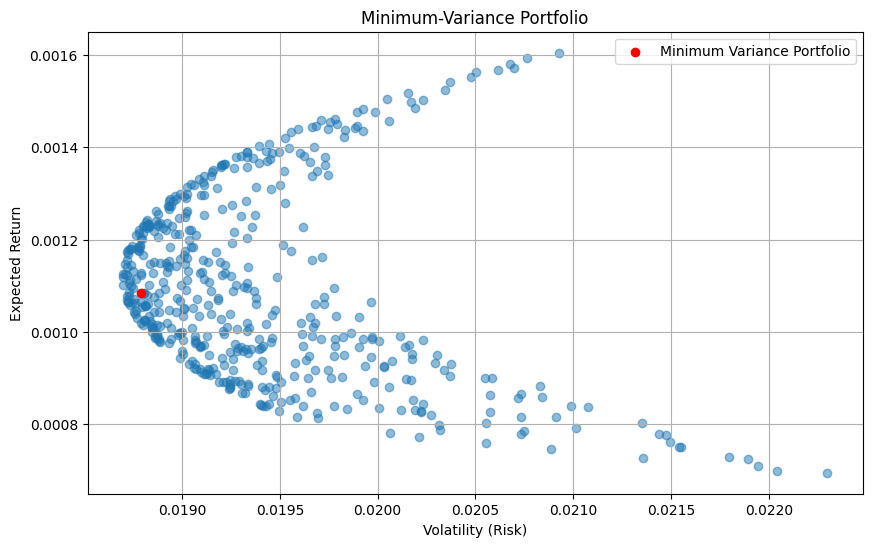

Minimum Variance Portfolio:
Weights: [0.33333333 0.33333333 0.33333333]
Expected Return: 0.0010843609173264964
Volatility: 0.018790403102529944


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tickers = ['AAPL', 'GOOGL', 'AMZN']
df = yf.download(tickers, start='2019-01-01')['Adj Close']
returns = df.pct_change(1).dropna()

# 공분산 행렬 계산
cov_matrix = returns.cov()

# 포트폴리오 종목 비중 초기화: uniform weights로
num_assets = len(returns.columns)
weights = np.ones(num_assets) / num_assets

# 최적화 함수로 최소 분산 포트폴리오 계산
from scipy.optimize import minimize

def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # 비중 합계는 1
bounds = tuple((0, 1) for _ in range(num_assets))  # 각 비중은 0과 1 사이

result = minimize(portfolio_variance, weights, args=(cov_matrix,),
                  method='SLSQP', constraints=constraints, bounds=bounds)

optimal_weights = result.x
min_variance = result.fun

# 최소 분산 포트폴리오 수익률 계산
expected_returns = returns.mean()
min_portfolio_return = np.dot(expected_returns, optimal_weights)

# 포트폴리오 시뮬레이션
n_simulations = 500
returns_simulated = np.zeros(n_simulations)
volatility_simulated = np.zeros(n_simulations)

for i in range(n_simulations):
    weights_simulated = np.random.dirichlet(np.ones(num_assets), size=1).flatten()
    returns_simulated[i] = np.dot(expected_returns, weights_simulated)
    volatility_simulated[i] = np.sqrt(portfolio_variance(weights_simulated, cov_matrix))

# 최소 분산 포트폴리오 그래프
plt.figure(figsize=(10, 6))
plt.scatter(volatility_simulated, returns_simulated, marker='o', alpha=0.5)
plt.scatter(np.sqrt(min_variance), min_portfolio_return, marker='o', color='red', label='Minimum Variance Portfolio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.title('Minimum-Variance Portfolio')
plt.legend()
plt.grid(True)
plt.show()

# Print minimum variance portfolio details
print('Minimum Variance Portfolio:')
print('Weights:', optimal_weights)
print('Expected Return:', min_portfolio_return)
print('Volatility:', np.sqrt(min_variance))

[*********************100%***********************]  3 of 3 completed


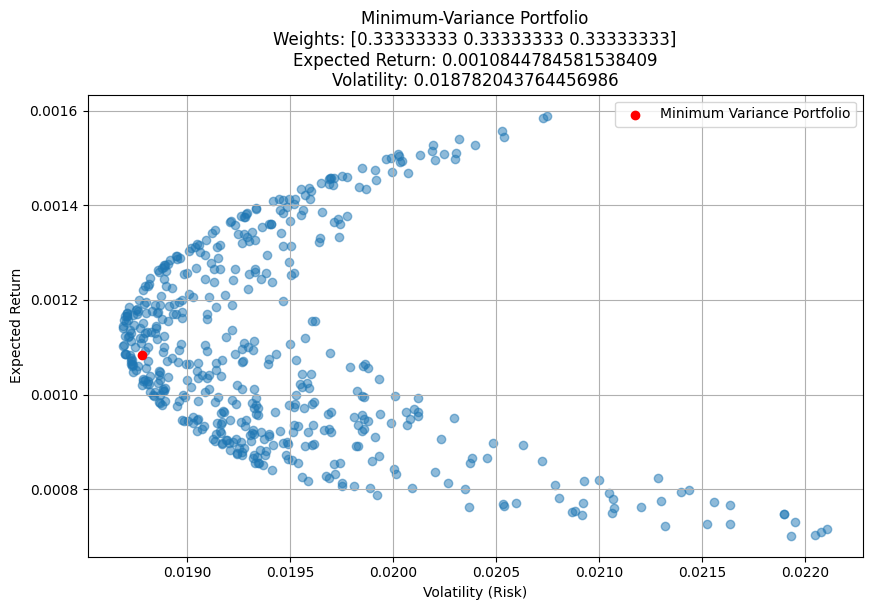

In [ ]:
# 위 코드에서 plt.title 부분만 수정했다:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tickers = ['AAPL', 'GOOGL', 'AMZN']
df = yf.download(tickers, start='2019-01-01')['Adj Close']
returns = df.pct_change(1).dropna()

# 공분산 행렬 계산
cov_matrix = returns.cov()

# 포트폴리오 종목 비중 초기화: uniform weights로
num_assets = len(returns.columns)
weights = np.ones(num_assets) / num_assets

# 최적화 함수로 최소 분산 포트폴리오 계산
from scipy.optimize import minimize

def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # 비중 합계는 1
bounds = tuple((0, 1) for _ in range(num_assets))  # 각 비중은 0과 1 사이

result = minimize(portfolio_variance, weights, args=(cov_matrix,),
                  method='SLSQP', constraints=constraints, bounds=bounds)

optimal_weights = result.x
min_variance = result.fun

# 최소 분산 포트폴리오 수익률 계산
expected_returns = returns.mean()
min_portfolio_return = np.dot(expected_returns, optimal_weights)

# 포트폴리오 시뮬레이션
n_simulations = 500
returns_simulated = np.zeros(n_simulations)
volatility_simulated = np.zeros(n_simulations)

for i in range(n_simulations):
    weights_simulated = np.random.dirichlet(np.ones(num_assets), size=1).flatten()
    returns_simulated[i] = np.dot(expected_returns, weights_simulated)
    volatility_simulated[i] = np.sqrt(portfolio_variance(weights_simulated, cov_matrix))

# 최소 분산 포트폴리오 그래프
plt.figure(figsize=(10, 6))
plt.scatter(volatility_simulated, returns_simulated, marker='o', alpha=0.5)
plt.scatter(np.sqrt(min_variance), min_portfolio_return, marker='o', color='red', label='Minimum Variance Portfolio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')

# 수정된 부분: optimal_weights, min_portfolio_return, np.sqrt(min_variance) 출력
title = f"Minimum-Variance Portfolio\nWeights: {optimal_weights}\nExpected Return: {min_portfolio_return}\nVolatility: {np.sqrt(min_variance)}"
plt.title(title)

plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  3 of 3 completed


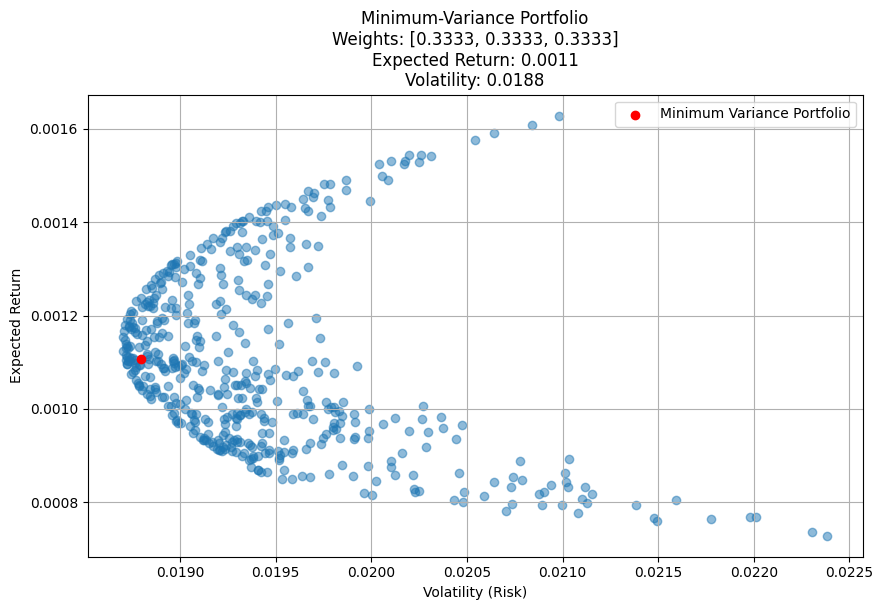

In [ ]:
# 다시 위 코드에서 title에 출력될 변수들을 소수점 네자리까지만 고려
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tickers = ['AAPL', 'GOOGL', 'AMZN']
df = yf.download(tickers, start='2019-01-01')['Adj Close']
returns = df.pct_change(1).dropna()

# 공분산 행렬 계산
cov_matrix = returns.cov()

# 포트폴리오 종목 비중 초기화: uniform weights로
num_assets = len(returns.columns)
weights = np.ones(num_assets) / num_assets

# 최적화 함수로 최소 분산 포트폴리오 계산
from scipy.optimize import minimize

def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # 비중 합계는 1
bounds = tuple((0, 1) for _ in range(num_assets))  # 각 비중은 0과 1 사이

result = minimize(portfolio_variance, weights, args=(cov_matrix,),
                  method='SLSQP', constraints=constraints, bounds=bounds)

optimal_weights = result.x
min_variance = result.fun

# 최소 분산 포트폴리오 수익률 계산
expected_returns = returns.mean()
min_portfolio_return = np.dot(expected_returns, optimal_weights)

# 포트폴리오 시뮬레이션
n_simulations = 500
returns_simulated = np.zeros(n_simulations)
volatility_simulated = np.zeros(n_simulations)

for i in range(n_simulations):
    weights_simulated = np.random.dirichlet(np.ones(num_assets), size=1).flatten()
    returns_simulated[i] = np.dot(expected_returns, weights_simulated)
    volatility_simulated[i] = np.sqrt(portfolio_variance(weights_simulated, cov_matrix))

# 최소 분산 포트폴리오 그래프
plt.figure(figsize=(10, 6))
plt.scatter(volatility_simulated, returns_simulated, marker='o', alpha=0.5)
plt.scatter(np.sqrt(min_variance), min_portfolio_return, marker='o', color='red', label='Minimum Variance Portfolio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')

# 수정된 부분: optimal_weights, min_portfolio_return, np.sqrt(min_variance) 소수점 아래 4자리 출력
optimal_weights_rounded = [round(weight, 4) for weight in optimal_weights]
min_portfolio_return_rounded = round(min_portfolio_return, 4)
min_variance_rounded = round(np.sqrt(min_variance), 4)
title = f"Minimum-Variance Portfolio\nWeights: {optimal_weights_rounded}\nExpected Return: {min_portfolio_return_rounded}\nVolatility: {min_variance_rounded}"
plt.title(title)
plt.legend()
plt.grid(True)
plt.show()

위 코드를 tickers, start_date, end_date와 n_simulations를 input으로 받고

위 Minimum Variance portfolio와 임의의 weights들에 대한 포트폴리오들을 plot시킨 그래프를 전부 출력시키는 함수로 만들자:

[*********************100%***********************]  5 of 5 completed


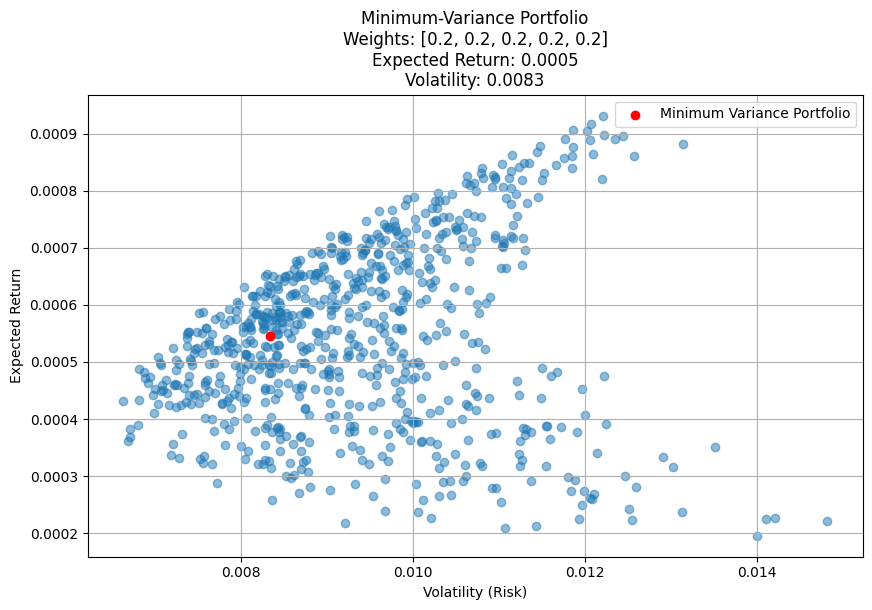

In [ ]:
# Minimum Variance portfolio와 임의의 weights들에 대한 포트폴리오들을 plot시킨 그래프를 전부 출력시키는 함수
def plot_MVP(tickers, start_date, end_date, n_simulations):
    df = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    returns = df.pct_change(1).dropna()

    # 공분산 행렬 계산
    cov_matrix = returns.cov()

    # 포트폴리오 종목 비중 초기화: uniform weights로
    num_assets = len(returns.columns)
    weights = np.ones(num_assets) / num_assets

    # 최적화 함수로 최소 분산 포트폴리오 계산
    from scipy.optimize import minimize

    def portfolio_variance(weights, cov_matrix):
        return np.dot(weights.T, np.dot(cov_matrix, weights))

    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # 비중 합계는 1
    bounds = tuple((0, 1) for _ in range(num_assets))  # 각 비중은 0과 1 사이

    result = minimize(portfolio_variance, weights, args=(cov_matrix,),
                    method='SLSQP', constraints=constraints, bounds=bounds)

    optimal_weights = result.x
    min_variance = result.fun

    # 최소 분산 포트폴리오 수익률 계산
    expected_returns = returns.mean()
    min_portfolio_return = np.dot(expected_returns, optimal_weights)

    # 포트폴리오 시뮬레이션
    # n_points = 500
    returns_simulated = np.zeros(n_simulations)
    volatility_simulated = np.zeros(n_simulations)

    for i in range(n_simulations):
        weights_simulated = np.random.dirichlet(np.ones(num_assets), size=1).flatten()
        returns_simulated[i] = np.dot(expected_returns, weights_simulated)
        volatility_simulated[i] = np.sqrt(portfolio_variance(weights_simulated, cov_matrix))

    # 최소 분산 포트폴리오 그래프
    plt.figure(figsize=(10, 6))
    plt.scatter(volatility_simulated, returns_simulated, marker='o', alpha=0.5)
    plt.scatter(np.sqrt(min_variance), min_portfolio_return, marker='o', color='red', label='Minimum Variance Portfolio')
    plt.xlabel('Volatility (Risk)')
    plt.ylabel('Expected Return')

    # 수정된 부분: optimal_weights, min_portfolio_return, np.sqrt(min_variance) 소수점 아래 4자리 출력
    optimal_weights_rounded = [round(weight, 4) for weight in optimal_weights]
    min_portfolio_return_rounded = round(min_portfolio_return, 4)
    min_variance_rounded = round(np.sqrt(min_variance), 4)
    title = f"Minimum-Variance Portfolio\nWeights: {optimal_weights_rounded}\nExpected Return: {min_portfolio_return_rounded}\nVolatility: {min_variance_rounded}"
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

tickers = ['GLD', 'SLV', 'AAPL', 'MSFT', 'KO']
start_date = '2010-01-01'
end_date = '2020-02-01'
n_simulations = 750
plot_MVP(tickers, start_date, end_date, n_simulations)

## 3.
같은 방법으로 아래와 같이 구현할 수도 있다( 물론 본질적으로 바탕이되는 수식은 위와 똑같다.

그리고 여기서는 plot할 때,

plt.scatter(vol_portf, ret_portf, `c=ret_portf/vol_portf`, marker='o')<br>
plt.`colorbar`(label='Sharpe ratio')

파트에서 colorbar로 샤프 비율을 시각적으로 나타냈다.

[참고한 블로그](https://hive.blog/dclick/@thrufore/day2-with-python-1539446432982)<br>
[같은 블로그인듯](https://steemit.com/dclick/@thrufore/day2-with-python-1539446432982):

[*********************100%***********************]  3 of 3 completed


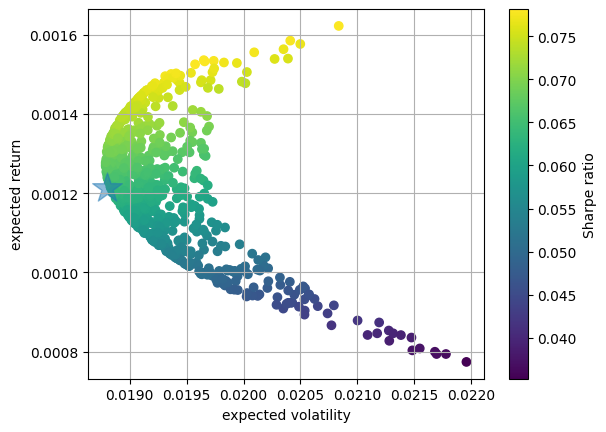

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# MVP와 함께 colorbar로 Sharpe ratio도 표시하는 함수
def plot_MVP_Sr(tickers, start_date, end_date, n_simulations):
    df = yf.download(tickers, start='2019-01-01')['Adj Close']
    returns = df.pct_change(1).dropna()

    ret_portf, vol_portf = [], []  # 포트폴리오의 returns & volatility
    num_assets = len(tickers)
    ret_mean = returns.mean()
    cov_mtx = returns.cov()

    for _ in range(n_simulations):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights) # normalize so that sum of weights to be 1
        ret_portf.append(np.sum(ret_mean * weights))
        vol_portf.append(np.sqrt(np.dot(np.dot(weights.T, cov_mtx), weights)))

    ret_portf = np.array(ret_portf)
    vol_portf = np.array(vol_portf)

    # minimize variance
    import scipy.optimize as sco

    def obj(weights):
        return np.sqrt(np.dot(np.dot(weights.T, cov_mtx), weights))

    w = np.ones(num_assets) / num_assets
    cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bnds = tuple((0, 1) for _ in range(num_assets))
    opt = sco.minimize(obj, w, method='SLSQP', bounds=bnds, constraints=cons)

    w_opt = opt['x']
    ret_opt = np.sum(ret_portf.mean() * opt['x'])
    vol_opt = np.sqrt(np.dot(np.dot(opt['x'].T, cov_mtx), opt['x']))

    plt.scatter(vol_portf, ret_portf, c=ret_portf/vol_portf, marker='o')
    plt.grid(True)
    plt.xlabel('expected volatility')
    plt.ylabel('expected return')
    plt.colorbar(label='Sharpe ratio')
    plt.scatter(vol_opt, ret_opt, marker='*', s=500, alpha=0.5)  # s는 마커의 크기를 설정
    plt.show()

tickers = ['AAPL', 'MSFT', 'AMZN']
start_date = '2010-01-01'
end_date = '2020-02-01'
n_simulations = 750
plot_MVP_Sr(tickers, start_date, end_date, n_simulations)

[*********************100%***********************]  3 of 3 completed


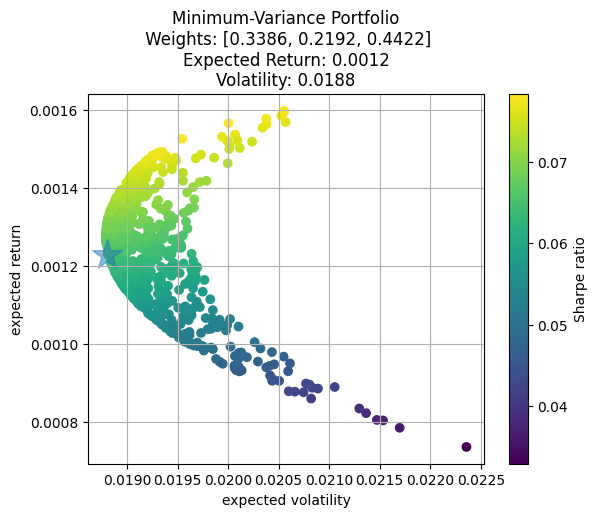

In [ ]:
# 위 코드에 title에 Min-Variance Weights/expected returns/expected volatility를 표기해주는 코드만 추가
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# MVP와 함께 colorbar로 Sharpe ratio도 표시하는 함수
def plot_MVP_Sr(tickers, start_date, end_date, n_simulations):
    df = yf.download(tickers, start='2019-01-01')['Adj Close']
    returns = df.pct_change(1).dropna()

    ret_portf, vol_portf = [], []  # 포트폴리오의 returns & volatility
    num_assets = len(tickers)
    ret_mean = returns.mean()
    cov_mtx = returns.cov()

    for _ in range(n_simulations):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights) # normalize so that sum of weights to be 1
        ret_portf.append(np.sum(ret_mean * weights))
        vol_portf.append(np.sqrt(np.dot(np.dot(weights.T, cov_mtx), weights)))

    ret_portf = np.array(ret_portf)
    vol_portf = np.array(vol_portf)

    # minimize variance
    import scipy.optimize as sco

    def obj(weights):
        return np.sqrt(np.dot(np.dot(weights.T, cov_mtx), weights))

    w = np.ones(num_assets) / num_assets
    cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bnds = tuple((0, 1) for _ in range(num_assets))
    opt = sco.minimize(obj, w, method='SLSQP', bounds=bnds, constraints=cons)

    w_opt = opt['x']
    ret_opt = np.sum(ret_portf.mean() * opt['x'])
    vol_opt = np.sqrt(np.dot(np.dot(opt['x'].T, cov_mtx), opt['x']))

    plt.scatter(vol_portf, ret_portf, c=ret_portf/vol_portf, marker='o')
    plt.grid(True)
    plt.xlabel('expected volatility')
    plt.ylabel('expected return')

    w_opt_rounded = [round(weight, 4) for weight in w_opt]
    ret_opt_rounded = round(ret_opt, 4)
    vol_opt_rounded = round(vol_opt, 4)
    title = f"Minimum-Variance Portfolio\n Weights: {w_opt_rounded}\nExpected Return: {ret_opt_rounded}\nVolatility: {vol_opt_rounded}"
    plt.title(title)

    plt.colorbar(label='Sharpe ratio')
    plt.scatter(vol_opt, ret_opt, marker='*', s=500, alpha=0.5)  # s는 마커의 크기를 설정
    plt.show()

tickers = ['AAPL', 'MSFT', 'AMZN']
start_date = '2010-01-01'
end_date = '2020-02-01'
n_simulations = 750
plot_MVP_Sr(tickers, start_date, end_date, n_simulations)

## 4. PyPortfolioOpt 패키지와 pulp를 이용하는 방법
PyPortfolioOpt 패키지는 [링크](https://pyportfolioopt.readthedocs.io/en/latest/UserGuide.html)에서 정보를 확인할 수 있으니 한 번 읽어보자.

[blog](https://skyeong.net/271)에서 참조:


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import datetime

In [ ]:
tickers = ['AAPL', 'MSFT', 'AMZN', 'NFLX', 'GOOGL']
num_assets = len(tickers)
weights = np.ones(num_assets) / num_assets
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [ ]:
start_date = '2013-01-01'
today = datetime.today().strftime('%Y-%m-%d')

df = pd.DataFrame()
for stock in tickers:
    df[stock] = yf.download(stock, start=start_date, end=today)['Adj Close']
df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,MSFT,AMZN,NFLX,GOOGL
Date,,,,,
2013-01-02,16.813858,22.668232,12.8655,13.144286,18.099348
2013-01-03,16.601633,22.364571,12.9240,13.798571,18.109859
2013-01-04,16.139200,21.945997,12.9575,13.711429,18.467718
2013-01-07,16.044260,21.904961,13.4230,14.171429,18.387136
2013-01-08,16.087442,21.790060,13.3190,13.880000,18.350851


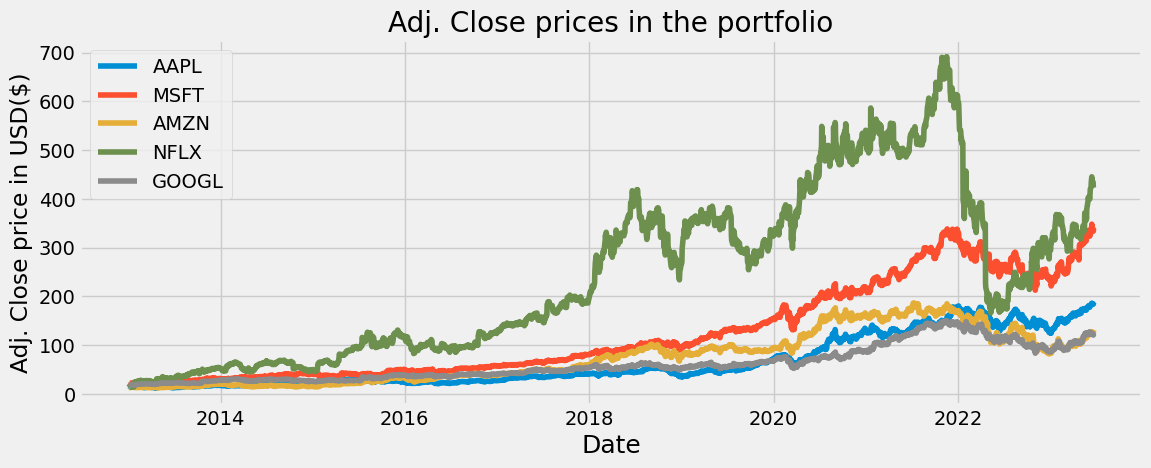

In [ ]:
plt.figure(figsize=(12.2,4.5))
for c in df.columns.values:
    plt.plot(df[c], label=c)
plt.title('Adj. Close prices in the portfolio')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj. Close price in USD($)')
plt.legend()
plt.show()

In [ ]:
returns = df.pct_change().dropna()
returns

,AAPL,MSFT,AMZN,NFLX,GOOGL
Date,,,,,
2013-01-03,-0.012622,-0.013396,0.004547,0.049777,0.000581
2013-01-04,-0.027855,-0.018716,0.002592,-0.006315,0.019760
2013-01-07,-0.005883,-0.001870,0.035925,0.033549,-0.004363
2013-01-08,0.002691,-0.005245,-0.007748,-0.020565,-0.001973
2013-01-09,-0.015629,0.005650,-0.000113,-0.012865,0.006573
...,...,...,...,...,...
2023-06-15,0.011199,0.031897,0.005458,0.010003,0.011482
2023-06-16,-0.005860,-0.016576,-0.012745,-0.029892,-0.012471
2023-06-20,0.000487,-0.012503,0.002311,0.006343,-0.003481


In [ ]:
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,AAPL,MSFT,AMZN,NFLX,GOOGL
AAPL,0.082820,0.048710,0.047684,0.043562,0.044989
MSFT,0.048710,0.073520,0.053180,0.050645,0.051474
AMZN,0.047684,0.053180,0.107447,0.074012,0.056494
NFLX,0.043562,0.050645,0.074012,0.224347,0.055392
GOOGL,0.044989,0.051474,0.056494,0.055392,0.075058


In [ ]:
var_portf = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
var_portf

0.06461886495407164

In [ ]:
vol_portf = np.sqrt(var_portf)
vol_portf

0.2542024094183052

In [ ]:
SimpleAnnualReturn_portf = np.sum(returns.mean() * weights) * 250
print('Expected annual return:', round(SimpleAnnualReturn_portf, 4) * 100, '%')
print('Annual volatility/risk/std. dev.:', round(vol_portf, 4) * 100, '%')
print('Annual variance:', round(var_portf, 4) * 100, '%')

Expected annual return: 29.9 %
Annual volatility/risk/std. dev.: 25.419999999999998 %
Annual variance: 6.460000000000001 %


위 예상 수익률과 리스크를 상회하는 최적 포트폴리오를 찾아본다

(여기서 optimal은 Sharpe ratio를 최대화하는 포트폴리오를 구축한다는 의미이다):

In [ ]:
pip install PyPortfolioOpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.4 MB/s eta 0:00:00


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# expected annual returns & sample covariaance matrix
mu = expected_returns.mean_historical_return(df)
C = risk_models.sample_cov(df)

ef = EfficientFrontier(mu, C)
weights = ef.max_sharpe()  # get raw weights maximizing Sharpe ratio
weights_cleaned = ef.clean_weights()  # 계산된 비중(weights)을 정리하여 불필요한 작은 값이나 오차를 제거
print(weights_cleaned)
ef.portfolio_performance(verbose=True)  # 최적화된 포트폴리오의 성과를 출력/verbose='True'로 설정하면 자세하게 출력/출력 결과에는 포트폴리오의 예상 연간 수익률, 예상 연간 변동성, 샤프 지수가 포함된다.

OrderedDict([('AAPL', 0.21527), ('MSFT', 0.57308), ('AMZN', 0.0), ('NFLX', 0.21165), ('GOOGL', 0.0)])
Expected annual return: 30.8%
Annual volatility: 25.8%
Sharpe Ratio: 1.12


(0.3084170323253436, 0.2575017079093941, 1.1200587159865656)

In [ ]:
weights

OrderedDict([('AAPL', 0.21527),
             ('MSFT', 0.57308),
             ('AMZN', 0.0),
             ('NFLX', 0.21165),
             ('GOOGL', 0.0)])

In [ ]:
weights_cleaned

OrderedDict([('AAPL', 0.21527),
             ('MSFT', 0.57308),
             ('AMZN', 0.0),
             ('NFLX', 0.21165),
             ('GOOGL', 0.0)])


ef.max_sharpe(): 샤프 지수를 최대화하는 최적의 비중(weights)을 계산합니다. 최적화는 주어진 평균 연간 수익률(mu)와 공분산 행렬(C)을 기반으로 이루어집니다.

ef.clean_weights(): 계산된 비중(weights)을 정리하여 불필요한 작은 값이나 오차를 제거합니다.

ef.portfolio_performance(verbose=True): 최적화된 포트폴리오의 성과를 출력합니다. 이때, verbose 매개변수를 True로 설정하면 자세한 결과를 확인할 수 있습니다. 출력 결과에는 포트폴리오의 예상 연간 수익률, 예상 연간 변동성, 샤프 지수가 포함됩니다.

Sharpe ratio-maximizing 포트폴리오에서 Sharpe ratio = 1.12 로 나타났다.

In [ ]:
pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 31.6 MB/s eta 0:00:00


In [ ]:
'''
각 자산의 개별 할당량을 (weights_cleaned에 따라) 계산
이를 위해 pip install pulp 필요
'''
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = weights_cleaned

# 위 포트폴리오에 15000 USD를 투자하는 경우
'''
DiscreteAllocation(): 이 클래스는 최적화된 비중(weights)과 최신 가격 정보(latest_prices)를 사용하여 개별 자산에 할당할 수 있는 최대 수량을 계산하는 기능을 제공
da.lp_portfolio(): linear programming을 사용하여 최대 수량 할당을 계산
'''
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)
allocation, leftover = da.lp_portfolio()

print("Discrete allocation: ", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation:  {'MSFT': 27, 'AMZN': 7, 'NFLX': 9, 'GOOGL': 8}
Funds remaining: $129.26


# #5.

[tistory blog](https://hotorch.tistory.com/64) 에서 참조:

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
from tqdm import tqdm

# O: 리얼티인컴 MAIN: 메인 스트리트 캐피털
tickers = ['MSFT','NVDA','O','AAPL','TSLA','JPM','SBUX','MAIN','AMZN']
prices = yf.download(tickers, start='2010-01-01',end='2021-08-22')['Adj Close'].dropna(how='all')
# prices = yf.download(tickers, start='2013-01-01',end='2021-08-22')['Adj Close'].dropna(how='all')
prices.head()

[*********************100%***********************]  10 of 10 completed


,AAPL,AMZN,JPM,MAIN,META,MSFT,NVDA,O,SBUX,TSLA
Date,,,,,,,,,,
2010-01-04,6.496295,6.6950,30.279610,5.618419,NaN,23.572371,4.241151,13.624306,9.164431,NaN
2010-01-05,6.507526,6.7345,30.866119,5.486138,NaN,23.579987,4.303082,13.853992,9.379132,NaN
2010-01-06,6.404015,6.6125,31.035709,5.440887,NaN,23.435278,4.330607,13.843544,9.311542,NaN
2010-01-07,6.392176,6.5000,31.650490,5.597534,NaN,23.191555,4.245738,14.135870,9.287686,NaN
2010-01-08,6.434674,6.6760,31.572773,5.545318,NaN,23.351482,4.254912,14.329013,9.255878,NaN


In [6]:
df = prices

In [8]:
daily_ret = df.pct_change().dropna()
annual_ret = daily_ret.mean() * 250
daily_cov = daily_ret.cov()
annual_cov = daily_cov * 250

# returns/volatility/weights/Sharpe ratios for randomly weighted portfolio
port_ret, port_vol, port_wgt, port_sr = [], [], [], []
num_assets = len(tickers)

# simulate random portfolios & pile the lists
for _ in tqdm(range(300000)):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)

    returns = np.dot(weights, annual_ret)
    volatility = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

    port_ret.append(returns)
    port_vol.append(volatility)
    port_wgt.append(weights)
    port_sr.append(returns/volatility)

100%|██████████| 300000/300000 [00:14<00:00, 20389.90it/s]


In [12]:
# turn the random portfolios (i.e., investment opportunity set) into DataFrame
rand_port = {'Returns': port_ret, 'Volatility': port_vol, 'Sharpe ratio': port_sr}
for i, s in enumerate(tqdm(tickers)):
    rand_port[s] = [weight[i] for weight in port_wgt]

df = pd.DataFrame(rand_port)
df = df[['Returns', 'Volatility', 'Sharpe ratio'] + [s for s in tickers]]

df

100%|██████████| 10/10 [00:00<00:00, 34.03it/s]


,Returns,Volatility,Sharpe ratio,MSFT,NVDA,O,AAPL,META,TSLA,JPM,SBUX,MAIN,AMZN
0,0.263829,0.212999,1.238640,0.003246,0.042347,0.153285,0.003184,0.305598,0.063897,0.003330,0.315256,0.047960,0.061896
1,0.373455,0.235585,1.585226,0.056091,0.050734,0.141753,0.153399,0.047898,0.065110,0.187516,0.008159,0.111505,0.177836
2,0.298201,0.208635,1.429298,0.111245,0.126128,0.146897,0.167636,0.007461,0.026947,0.012795,0.123145,0.131929,0.145817
3,0.283668,0.200987,1.411375,0.101840,0.155912,0.022856,0.051594,0.139554,0.154413,0.059491,0.151350,0.142211,0.020778
4,0.347623,0.223970,1.552095,0.078801,0.152576,0.042737,0.159518,0.156359,0.053799,0.138758,0.045646,0.057404,0.114403
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0.313501,0.210372,1.490226,0.143504,0.008471,0.097352,0.121655,0.079134,0.147985,0.139382,0.042678,0.157792,0.062048
299996,0.309936,0.207172,1.496034,0.153507,0.150196,0.043217,0.092823,0.056772,0.050802,0.054435,0.134772,0.149429,0.114046
299997,0.298468,0.204936,1.456399,0.115189,0.077709,0.007403,0.128535,0.136692,0.148888,0.082393,0.147300,0.094390,0.061500
299998,0.339633,0.228112,1.488890,0.129304,0.093425,0.064205,0.023730,0.231148,0.241456,0.042092,0.038331,0.024497,0.111813


1. Min-Variance portfolio (최소-분산 포트폴리오)와
2. Max-Sharpe ratio portfolio (최대-샤프지수 포트폴리오)

를 골라보고 `volatility-expected returns 그래프`에 plot해보자.

In [13]:
min_vol = df['Volatility'].min()
max_sr = df['Sharpe ratio'].max()

# minimum volatility(variance) 포트폴리오 & maximum Sharpe ratio 포트폴리오
port_min_vol = df.loc[df['Volatility'] == min_vol]
port_max_sr = df.loc[df['Sharpe ratio'] == max_sr]

print(port_min_vol)
print(port_max_sr)

         Returns  Volatility  Sharpe ratio      MSFT      NVDA         O  \
229387  0.236829    0.188371      1.257252  0.098624  0.157579  0.117403   

            AAPL      META      TSLA       JPM      SBUX      MAIN      AMZN  
229387  0.126705  0.016491  0.066758  0.014702  0.197313  0.201321  0.003105  
         Returns  Volatility  Sharpe ratio      MSFT      NVDA         O  \
261756  0.426165    0.258145      1.650875  0.037684  0.152672  0.126706   

            AAPL      META      TSLA       JPM      SBUX      MAIN      AMZN  
261756  0.022158  0.034637  0.095196  0.274512  0.010979  0.051604  0.193853  


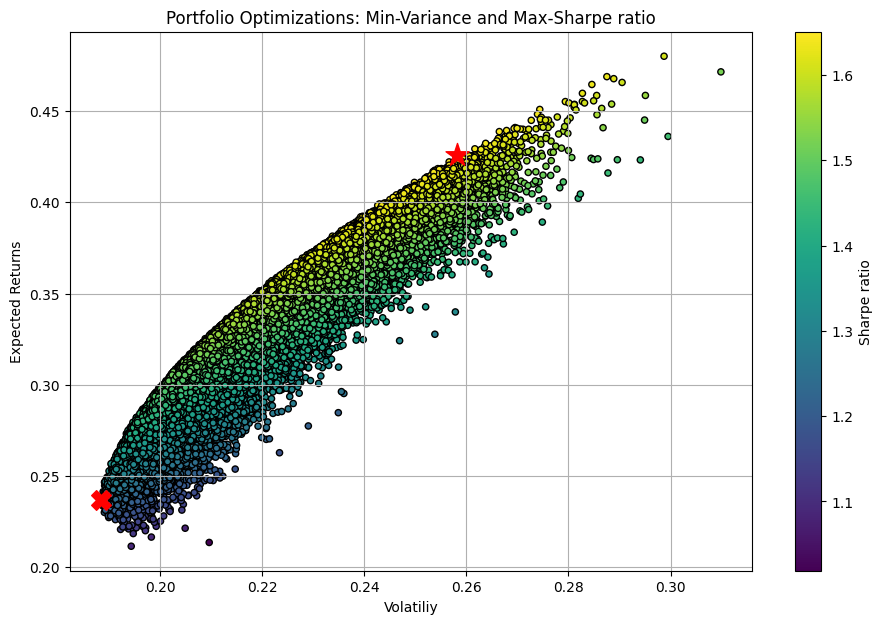

In [16]:
# random portfolios/min-var/max-sharpe ratio portfolios를 각각 plot
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe ratio', cmap='viridis',
                edgecolors='k', figsize=(11,7), grid=True)
plt.scatter(x=port_max_sr['Volatility'], y=port_max_sr['Returns'], c='r',
            marker='*', s=300)
plt.scatter(x=port_min_vol['Volatility'], y=port_min_vol['Returns'], c='r',
            marker='X', s=200)
plt.title('Portfolio Optimizations: Min-Variance and Max-Sharpe ratio')
plt.xlabel('Volatiliy')
plt.ylabel('Expected Returns')
plt.show()

In [18]:
# Max-Sharpe ratio 포트폴리오의 각 자산 비중: dict. 형
wgt_max_sr_dict = dict(zip(list(port_max_sr[tickers].columns),
                             port_max_sr[tickers].values.flatten().tolist()))
wgt_max_sr_dict

{'MSFT': 0.03768361659653936,
 'NVDA': 0.1526723426616448,
 'O': 0.12670580858197833,
 'AAPL': 0.02215762986677612,
 'META': 0.03463700534174765,
 'TSLA': 0.09519606862206832,
 'JPM': 0.274511513333515,
 'SBUX': 0.01097872526825703,
 'MAIN': 0.05160408827242903,
 'AMZN': 0.19385320145504445}

<Axes: >

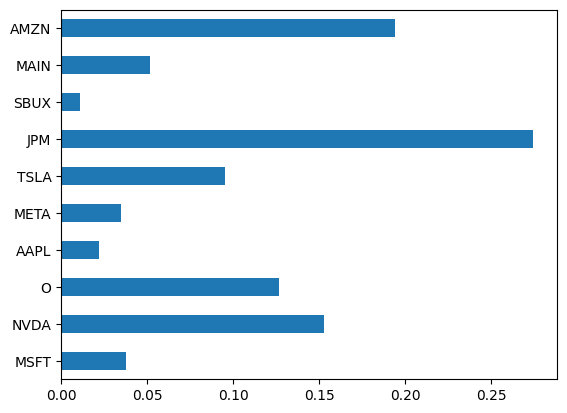

In [19]:
# barhplot으로 시각화
from collections import OrderedDict
wgt_max_sr = OrderedDict(wgt_max_sr_dict)
pd.Series(wgt_max_sr).plot.barh()

마찬가지로 min-variance portfolio에 대한 자산 비중을 구하고

시각화하면 다음과 같다:

In [26]:
wgt_min_var_dict = dict(zip(list(port_min_vol[tickers].columns),
                                 port_min_vol[tickers].values.flatten().tolist()))
wgt_min_var_dict

{'MSFT': 0.09862371968879773,
 'NVDA': 0.15757889003423686,
 'O': 0.11740287336330063,
 'AAPL': 0.1267047757245956,
 'META': 0.016490800242828278,
 'TSLA': 0.06675807582346696,
 'JPM': 0.01470191976701896,
 'SBUX': 0.19731258163536725,
 'MAIN': 0.20132140890139563,
 'AMZN': 0.003104954818992141}

<Axes: >

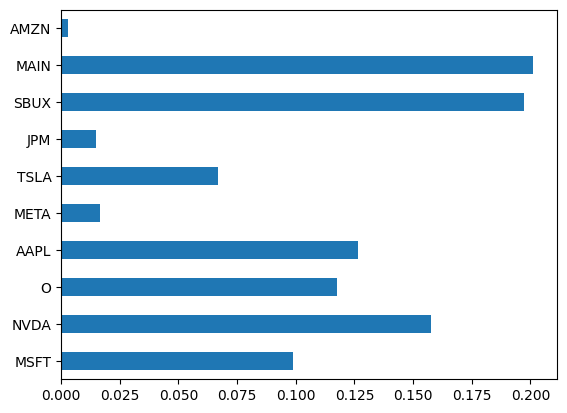

In [27]:
wgt_min_var = OrderedDict(wgt_min_var_dict)
pd.Series(wgt_min_var).plot.barh()

위와 마찬가지로 pypfopt의 DiscreteAllocation을 사용하여

마지막 종가 기준으로 10000 USD를 위 포트폴리오에 투자할 때, 각 자산 배분을 어떻게 하는지 보여준다:

In [30]:
pip install PyPortfolioOpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 5.7 MB/s eta 0:00:00


In [32]:
from pypfopt import DiscreteAllocation

latest_prices = prices.iloc[-1] # 마지막 종가 기준
da = DiscreteAllocation(wgt_max_sr, latest_prices, total_portfolio_value=10000)
alloc, leftover = da.lp_portfolio()
print(f"Discrete allocation performed with ${leftover:.2f}leftover")
alloc

Discrete allocation performed with $104.79leftover


/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


{'NVDA': 10,
 'O': 9,
 'AAPL': 8,
 'META': 1,
 'TSLA': 3,
 'JPM': 13,
 'SBUX': 2,
 'MAIN': 5,
 'AMZN': 9}

물론 min_vol 포트폴리오에 투자할 때의 자산 배분은 다음과 같다:

In [33]:

latest_prices = prices.iloc[-1] # 마지막 종가 기준
da = DiscreteAllocation(wgt_min_var, latest_prices, total_portfolio_value=10000)
alloc, leftover = da.lp_portfolio()
print(f"Discrete allocation performed with ${leftover:.2f}leftover")
alloc

Discrete allocation performed with $134.60leftover


{'MSFT': 7,
 'NVDA': 10,
 'O': 8,
 'AAPL': 35,
 'TSLA': 2,
 'JPM': 1,
 'SBUX': 31,
 'MAIN': 18}

# #6
1. reference: [Mean-Variance Portfolio Optimization using Python](https://lumos-datascience.medium.com/mean-variance-portfolio-optimization-using-python-8485fccb9f8b)

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import yfinance as yf

tickers = ['AAPL', 'MSFT', 'AMZN', 'NFLX', 'GOOGL'] # 'TSLA': 변동성이 너무 커서 cumrets 그래프를 그리면 다른 종목들의 누적수익률을 제대로 볼 수 없어서 제외
df = yf.download(tickers, start='2010-01-01')['Adj Close']
df

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,GOOGL,MSFT,NFLX
Date,,,,,
2010-01-04,6.496294,6.695000,15.684434,23.572369,7.640000
2010-01-05,6.507526,6.734500,15.615365,23.579987,7.358571
2010-01-06,6.404015,6.612500,15.221722,23.435272,7.617143
2010-01-07,6.392177,6.500000,14.867367,23.191559,7.485714
2010-01-08,6.434674,6.676000,15.065566,23.351500,7.614286
...,...,...,...,...,...
2023-06-16,184.919998,125.489998,123.529999,342.329987,431.959991
2023-06-20,185.009995,125.779999,123.099998,338.049988,434.700012
2023-06-21,183.960007,124.830002,120.550003,333.559998,424.450012


In [30]:
rets = df.pct_change(1).dropna()
cumrets = rets.add(1).cumprod().sub(1)*100

In [31]:
# 위 tickers의 누적수익률 plot
fig = px.line(cumrets, x=cumrets.index, y=cumrets.columns, title='Cumulative Returns (2010.01-2023.06)')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')
fig.show()

In [35]:
tickers_market = ['SPY', 'NDX']  # 'DJIA', 'IXIC'는 NaN 값들이 많아서 일단 제외
df_market = yf.download(tickers_market, start='2010-01-01')['Close'].dropna()
df_market

[*********************100%***********************]  2 of 2 completed


,NDX,SPY
Date,,
2010-01-04,1886.699951,113.330002
2010-01-05,1888.430054,113.629997
2010-01-06,1878.420044,113.709999
2010-01-07,1876.719971,114.190002
2010-01-08,1892.589966,114.570000
...,...,...
2023-06-16,15083.919922,439.459991
2023-06-20,15070.150391,437.179993
2023-06-21,14867.450195,434.940002


In [39]:
# market index들의 누적수익률 plot
rets_index = df_market.pct_change(1).dropna()
cumrets_index = rets_index.add(1).cumprod().sub(1)*100

fig = px.line(cumrets_index, x=cumrets_index.index, y=cumrets_index.columns, title='Cumulative Returns of Market Indices (2010.01-2023.06)')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')
fig.show()

In [40]:
corr = df[df.columns].corr(method='pearson')
corr

,AAPL,AMZN,GOOGL,MSFT,NFLX
AAPL,1.000000,0.896055,0.961383,0.986834,0.797118
AMZN,0.896055,1.000000,0.937690,0.934311,0.959526
GOOGL,0.961383,0.937690,1.000000,0.978605,0.867892
MSFT,0.986834,0.934311,0.978605,1.000000,0.858235
NFLX,0.797118,0.959526,0.867892,0.858235,1.000000


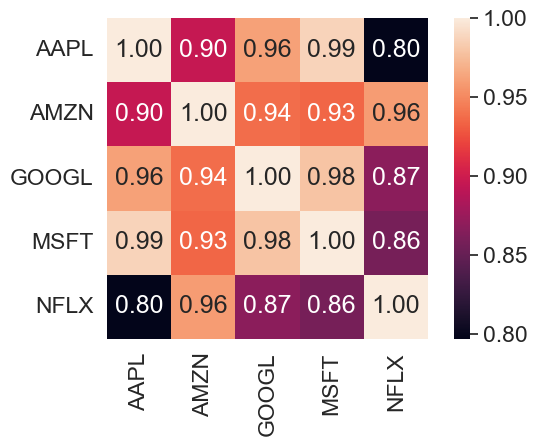

In [52]:
# visualize the Corr matrix using sns.heatmap
sns.set(font_scale=1.5)
heat_map = sns.heatmap(corr.values, cbar=True, annot=True,  # annot=True: heatmap에 상관계수 표기
                       square=True, fmt='.2f',  # fmt를 통해 소수점 2자리까지 상관계수 표기
                    #    annot_kws={'size: 15'},  # heatmap에 출력하는 상관계수의 크기
                       xticklabels=df.columns, yticklabels=df.columns)
plt.tight_layout()
plt.show()

우리의 ticker들중 `AAPL`과 `NFLX`가 correlation coefficient(상관 계수)가 가장 낮음에도 불구하고 무려 0.80이나 된다.

따라서, 그닥 좋지 않은 포트폴리오다.

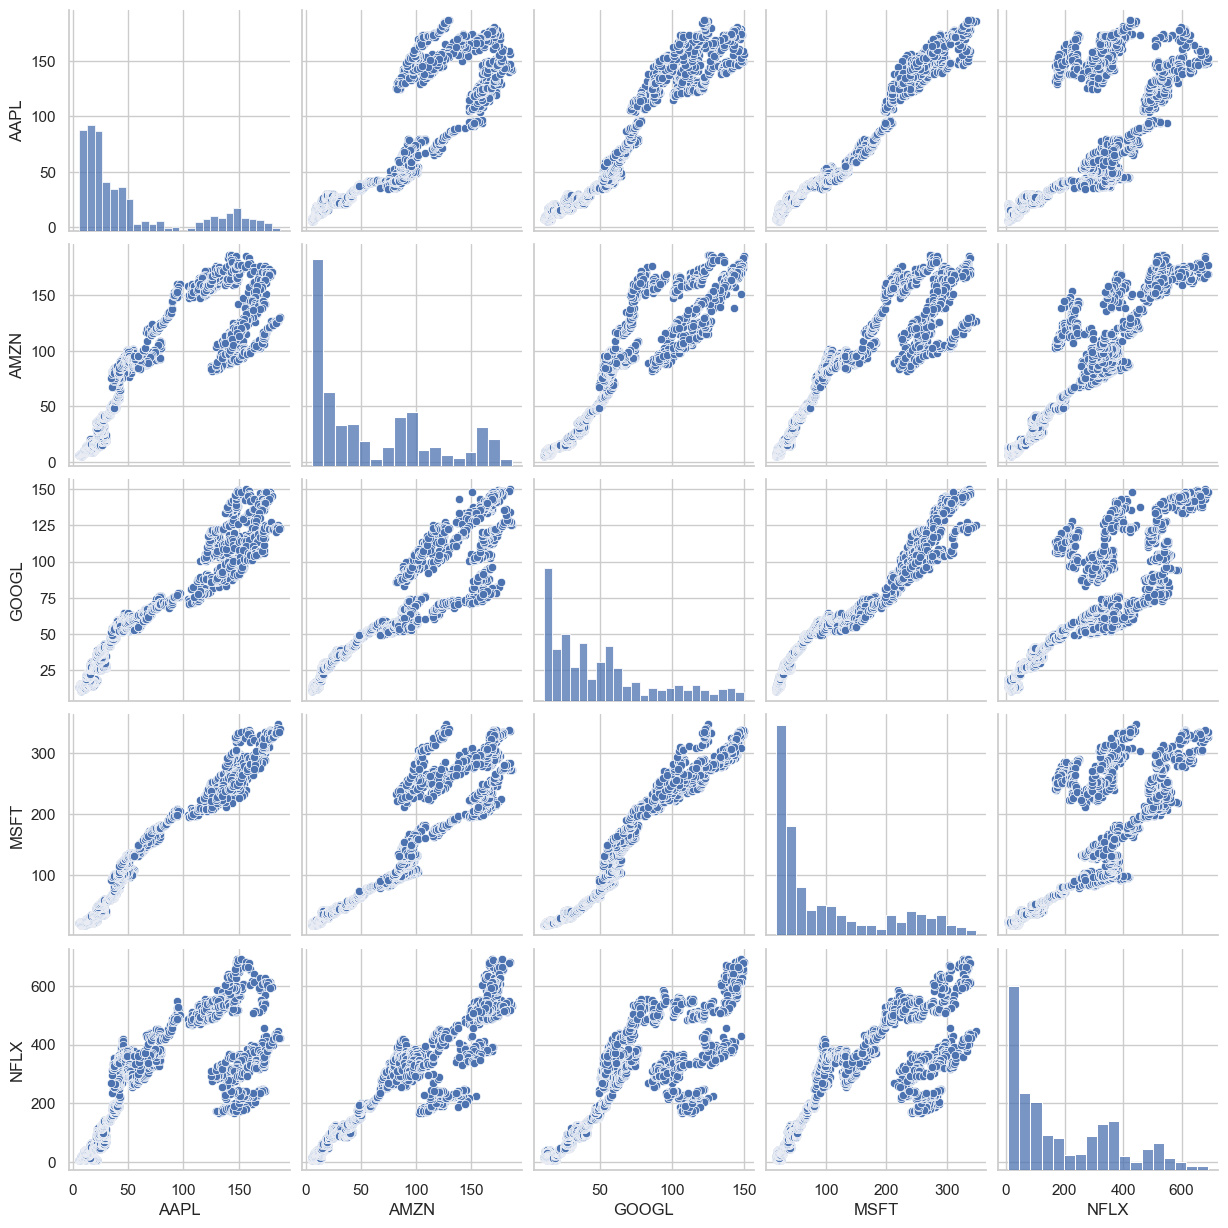

In [53]:
sns.set(style='whitegrid')
sns.pairplot(df)
plt.show()

### Portfolio optimization
1. expected returns and covariance matrix (exponentially weighted)
위와 마찬가지로 `pypfopt` 를 사용

In [ ]:
pip install PyPortfolioOpt

In [ ]:
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.risk_models import exp_cov
from pypfopt.expected_returns import ema_historical_return
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.plotting import plot_efficient_frontier
from pypfopt.plotting import plot_plot_weights
from pypfopt.cla import CLA

train = rets.ema_historical_return(train, returns_data=True, span=500)
test = risk_models.exp_cov(train, returns_data=True, span=180)

In [ ]:
# efficient frontier
ret_ef = np.arange(0, 1, 0.01)
vol_ef = []
for i in np.arange(0, 1, 0.01):
    ef = EfficientFrontier(mu, sigma)
    ef.efficient_return(i)
    vol_ef.append(ef.portfolio_performance()[1])

ef = EfficientFrontier(mu, Sigma)
ef.min_volatility()
min_vol_ret = ef.portfolio_performance()[0]
min_vol_vol = ef.portfolio_performance()[1]

ef.max_sharpe(risk_free_rate=0.01)
max_sharpe_ret = ef.portfolio_performance()[0]
max_sharpe_vol = ef.portfolio_performance()[1]

sns.set()
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x=vol_ef, y=ret_ef, ax=ax, label='Efficient Frontier')
sns.scatterplot(x=[min_vol_vol], y=[min_vol_ret], ax=ax, label='Min-Var Portfolio', color='purple', s=100)
sns.scatterplot(x=[max_sharpe_vol], y=[max_sharpe_ret], ax=ax, label='Max-Sharpe Portfolio', color='green', s=100)
sns.lineplot(x=[0, max_sharpe_vol, 1], y=[0.01, max_sharpe_ret, 3.096], label='Capital Market Line', ax=ax, color='r')

ax.set(xlim=[0, 0.4])
ax.set(ylim=[0, 1])
ax.set_xlabel('Voltility')
ax.set_ylabel('Expected Returns')
plt.legend(fontsize='large')
plt.title('Efficient Frontier', fontsize='20')

ax.figure.savefig('EffFront_big.png', dpi=300)

In [ ]:
# min-variance portfolio
ef = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp = ef.min_volatility()

plot_weights(raw_weights_minvar_exp)
ef.portfolio_performance(verbose=True, risk_free_rate=0.01)

In [ ]:
# max-Sharpe ratio portfolio
ef = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef.mar_sharpe(risk_free_rate=0.01)

plot_weights(raw_weights_maxsharpe_exp)
ef.portfolio_performance(verbose=True, risk_free_rate=0.01)

### Backtesting

In [ ]:
weights_minvar_exp = list(raw_weights_minvar_exp.values())
weights_maxsharpe_exp = list(raw_weights_maxsharpe_exp.values())

ret_minvar = test.dot(weights_minvar_exp).add(1).cumprod().subtract(1).multiply(100)
ret_maxsharpe = test.dot(weights_maxsharpe_exp).add(1).cumprod().subtract(1).multiply(100)
# recall cumrets_index = rets_index.add(1).cumprod().sub(1)*100

# backtesting via plotting
back = pd.DateFrame({'MinVar': ret_minvar, 'MaxSharpe': ret_maxsharpe})
back = pd.concat([back, cumrets_index], join='outer', axis=1)
back.drop(back.tail(1).index, inplace=True)

back.interpolate(method='linear', inplace=True)

fig = px.line(back, x=back.index, y=back.columns, title='Portfolio Performance (2010-2023.06)')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')
fig.show()